In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Load data dari repository github
dataset = pd.read_excel('https://raw.githubusercontent.com/farhantk/ML-case-based-1/main/arrhythmia.xlsx')
dataset.shape


(452, 280)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
#Preprocessing
# pisahkan data X dan Y(target)
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

# Hapus kolom yang memiliki data kosong sebanyak 30%
thresh = len(X) * 0.3
X.dropna(thresh = thresh, axis = 1, inplace = True)

# Jika ada data yang bernilai null akan diisi dengan mediannya
mean = SimpleImputer(missing_values=np.NaN, strategy='median')
imputer = mean.fit(X)
df_imp = imputer.transform(X)
X = pd.DataFrame(df_imp)

# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(X.values) 
X = pd.DataFrame(x_scaled, index = X.index)

X.shape

(452, 278)

In [ ]:
Y.unique()

array([ 8,  6, 10,  1,  7, 14,  3, 16,  2,  4,  5,  9, 15])

In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Memisahkan data train dan data test
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,  random_state=5)

Xtrain = np.array(X_train)
Ytrain = to_categorical( Y_train)
Xtest = np.array(X_test)
Ytest = to_categorical(Y_test)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight ='balanced', classes =np.unique(Y_train), y=Y_train)
class_weights_dict = dict(zip([1,2,3,4,5,6,7,8,9,10,14,15,16], class_weights))
class_weights_dict[0] = 0
class_weights_dict[11] = 0
class_weights_dict[12] = 0
class_weights_dict[13] = 0
print(class_weights.sum())
print(class_weights_dict)

64.21936718194168
{1: 0.1389010989010989, 2: 0.8381962864721485, 3: 1.8698224852071006, 4: 2.2097902097902096, 5: 3.4725274725274726, 6: 1.4298642533936652, 7: 8.102564102564102, 8: 24.307692307692307, 9: 3.0384615384615383, 10: 0.7365967365967366, 14: 8.102564102564102, 15: 8.102564102564102, 16: 1.8698224852071006, 0: 0, 11: 0, 12: 0, 13: 0}


In [ ]:

from keras.layers.convolutional import Conv1D
from keras.layers import Activation, Dense , Dropout, Flatten
from keras.models import Sequential
#model
CNN = Sequential()

CNN.add(Conv1D(filters=64, kernel_size=10,activation='relu',kernel_initializer='he_uniform', input_shape=(278,1)))
CNN.add(Conv1D(filters=128, kernel_size=10,activation='relu',kernel_initializer='he_uniform'))
CNN.add(Dropout(0.3))
CNN.add(Dense(256, activation='relu'))
CNN.add(Dense(128, activation='relu'))
CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(32, activation='relu'))
CNN.add(Flatten())
CNN.add(Dense(17, activation='softmax'))
CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
batch_size= 8
no_epochs = 50

earlystop = EarlyStopping(monitor='val_accuracy', patience=20)
checkpoint = ModelCheckpoint('model-epoch-{epoch:03d}-valacc-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=False, mode='auto')

hist = CNN.fit(Xtrain, Ytrain, 
                 epochs=no_epochs, 
                 batch_size=batch_size, 
                 validation_data=(Xtest, Ytest),
                 callbacks=[earlystop, checkpoint],
                 class_weight = class_weights_dict)

Epoch 1/50
39/40 [============================>.] - ETA: 0s - loss: 2.9851 - accuracy: 0.1891
Epoch 1: saving model to model-epoch-001-valacc-0.308824.h5
40/40 [==============================] - 6s 96ms/step - loss: 2.9670 - accuracy: 0.1899 - val_loss: 2.4000 - val_accuracy: 0.3088
Epoch 2/50
40/40 [==============================] - ETA: 0s - loss: 2.6675 - accuracy: 0.2911
Epoch 2: saving model to model-epoch-002-valacc-0.279412.h5
40/40 [==============================] - 7s 165ms/step - loss: 2.6675 - accuracy: 0.2911 - val_loss: 2.1340 - val_accuracy: 0.2794
Epoch 3/50
40/40 [==============================] - ETA: 0s - loss: 2.4367 - accuracy: 0.3418
Epoch 3: saving model to model-epoch-003-valacc-0.389706.h5
40/40 [==============================] - 6s 160ms/step - loss: 2.4367 - accuracy: 0.3418 - val_loss: 2.1957 - val_accuracy: 0.3897
Epoch 4/50
40/40 [==============================] - ETA: 0s - loss: 1.5068 - accuracy: 0.4589
Epoch 4: saving model to model-epoch-004-valacc-0.28

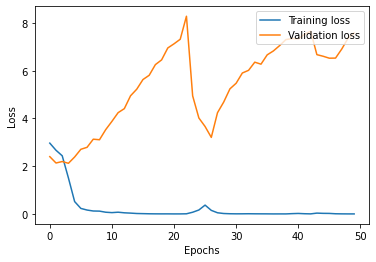

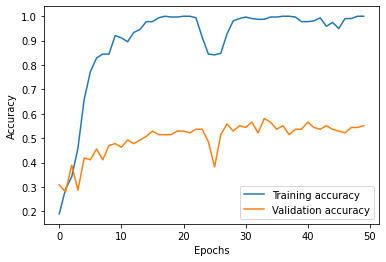

In [ ]:
from matplotlib import pyplot as plt
sub=0
# visualizing losses and accuracy
train_loss = hist.history['loss'][sub:]
val_loss = hist.history['val_loss'][sub:]
train_accu = hist.history['accuracy'][sub:]
val_accu = hist.history['val_accuracy'][sub:]
xc = range(len(val_loss))

fig1 = plt.figure()
fig1.patch.set_facecolor('white')
plt.plot(xc, train_loss, label='Training loss')
plt.plot(xc, val_loss, label='Validation loss')
plt.legend(loc="upper right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
fig1.show()

fig2 = plt.figure()
fig2.patch.set_facecolor('white')
plt.plot(xc, train_accu, label='Training accuracy')
plt.plot(xc, val_accu, label='Validation accuracy')
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
fig2.show()